In [2]:
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np
from math import ceil, floor,  pi
import scipy.ndimage

asdfsd

In [3]:
def gaussDeriv2D(sigma):
    x = np.array(range(0, 6*ceil(sigma)))
    y = np.transpose(x)
    Gx = ((x-3*ceil(sigma))/(2*pi*sigma**4))*(np.exp(-(((x-3*ceil(sigma))**2+(y-3*ceil(sigma))**2)/(2*sigma**2))))
    Gy = ((y-3*ceil(sigma))/(2*pi*sigma**4))*(np.exp(-(((x-3*ceil(sigma))**2+(y-3*ceil(sigma))**2)/(2*sigma**2))))
    return [Gx, Gy]

def blur(im, a):
    Gx, Gy = gaussDeriv2D(a)
    Gx = Gx[:, None]
    Gy = Gy[None, :]
    gxIm = scipy.ndimage.correlate(im, Gx, mode='nearest')
    gyIm = scipy.ndimage.correlate(im, Gy, mode='nearest')
    blurred = np.sqrt(gxIm**2 + gyIm**2) 
    return blurred

def sample(im):
    lx, ly = im.shape
    sampled = np.zeros((int(lx / 2), int(ly / 2)))
    for m in range(0, lx - 1, 2):
        for n in range(0, ly - 1, 2):
            sampled[int(m / 2), int(n / 2)] = im[m, n]
    return sampled
        
def interpolate(im):
    lx, ly = im.shape
    interp = np.zeros((lx * 2 - 1, ly * 2 - 1))
    for x in range(1, lx * 2, 2):
        interp[x - 1, :ly] = im[x / 2, :]
        interp[x + 1, :ly] = im[x / 2 + 1, :]
        interp[x, :ly] = (im[x / 2, :] + im[x / 2 + 1, :]) / 2
    
    for y in range(ly - 1, 0, -1):
        interp[:lx * 2, y * 2] = interp[:lx * 2, y]
        if y != ly:
            interp[:lx * 2, y * 2] = np.zeros((lx * 2, 1))

    for y in range(0, ly * 2, 2):
        interp[:, y] = (interp[:, y] + interp[:, y]) / 2
    


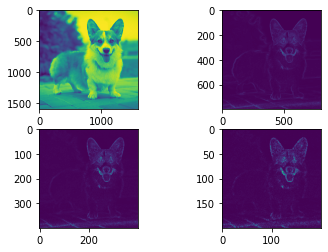

In [4]:
myIm = rgb2gray(cv2.imread('corgi-dog.jpg'))

sampled = [myIm]
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(sampled[0])
for i in range(1,4):
    sampled.append(sample(blur(sampled[i-1], 0.4)))
    plt.subplot(2, 2, i+1)
    plt.imshow(sampled[i])


# error = {}
# figure()
# subplot(2, 2, 4)
# imagesc(sampled{4})
# for i = 3:-1:1
#     interp = interpolate(sampled{i+1})
#     subplot(2, 2, i)
#     error{i} = sampled{i} - interp
#     imagesc(error{i})
# end
# sgtitle('interpolation error')

# reconstruct = sampled{4}
# for i = 3:-1:1
#     reconstruct = interpolate(reconstruct) + error{i}
# end
# figure()
# imshow(reconstruct)
# title('reconstruction')